In [59]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
base = pd.read_csv("Base.csv",";")

In [114]:
base.head()

,sexo,HorotaDia,FrutaDia,CarneGordura,Atividade,Hiptertensao,Diabetes,Colesterol,idade,IMC
0,0,0,1,0,0,1,0,0,36,36.11
1,0,3,2,0,0,1,1,1,70,66.67
2,0,3,2,0,0,0,0,0,40,38.89
3,0,1,2,0,0,1,0,0,73,36.81
4,1,2,1,0,0,1,1,0,83,50.00


In [115]:
features = base.columns.tolist()[0:]
features.pop(features.index('Colesterol'))


'Colesterol'

In [116]:
#features

In [146]:
from sklearn.model_selection import train_test_split
X = base[features]
y = base.Colesterol
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state =42)

In [147]:
features = X.columns.tolist()

In [148]:
#for i in features:
#    print i + '    :    ' + str(sum(X_train[i].isnull()))

In [149]:
#for i in features:
#    print i
#    print X_train.groupby(y_train)[i].describe()

In [150]:
#print X_train.shape
#print X_test.shape

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [152]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier. By convention, clf means 'classifier'
clf = RandomForestClassifier(n_jobs=300)
clf.fit(X_train,y_train)

#mlp.fit(X_train[features], y)
#from sklearn.neural_network import MLPClassifier
#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=300, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [154]:
predictions = clf.predict(X_test)

In [155]:
probs = clf.predict_proba(X_test)

#print(probs)

In [156]:
from sklearn.metrics import roc_auc_score
auc_ = roc_auc_score(y_test, probs[:,1])
print("AUC: %.4f" % auc_)

AUC: 0.6286


In [157]:
from sklearn.metrics import accuracy_score
print("acurácia: %.4f" % accuracy_score(y_test, predictions))

acurácia: 0.7079


In [158]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print classification_report(y_test,predictions)

[[17183  2347]
 [ 5383  1552]]
             precision    recall  f1-score   support

          0       0.76      0.88      0.82     19530
          1       0.40      0.22      0.29      6935

avg / total       0.67      0.71      0.68     26465



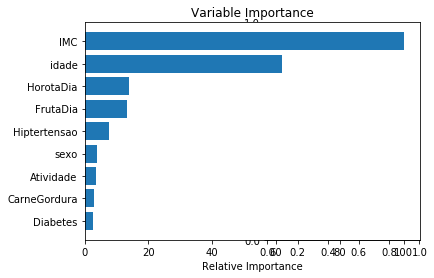

In [159]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.subplot(1, 2, 2)
fig = plt.figure(1,figsize=(1000,1000))
ax = fig.add_subplot(111)

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,map(lambda x: features[x], sorted_idx))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()



In [160]:
import pickle
#s = pickle.dumps(clf)
#clf2 = pickle.loads(s)
#clf2.predict(X[0:1])
#array([0])
#y[0]


In [182]:
from sklearn.externals import joblib
joblib.dump(clf, 'lifeordie.pkl') 

['lifeordie.pkl']

In [183]:
clf3 = joblib.load('lifeordie.pkl')

In [186]:
#value = [
#            weigth_data["sexo"],
#            weigth_data["horotadia"],
#            weigth_data["frutadia"],
#            weigth_data["carnegordura"],
#            weigth_data["atividade"],
#            weigth_data["hiptertensao"],
#            weigth_data["diabetes"]
#]
#sexo;HorotaDia;FrutaDia;CarneGordura;Atividade;Hiptertensao;Diabetes;Colesterol;idade;IMC
#value=[0,2,1,1,0,0,0,20,20]
value=[1,4,1,0,1,0,0,20,23]
data = clf3.predict_proba(list(value)).tolist()[0]


C:\Users\fgomesja\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [187]:
print(data)

[0.5, 0.5]
